In [1]:
import xarray as xr
import glob

In [2]:
pr_file_list = glob.glob('/Users/z3526123/Downloads/data/pr*')

In [3]:
pr_file_list.sort()

In [4]:
pr_file_list

['/Users/z3526123/Downloads/data/pr_day_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_18500101-18741231.nc',
 '/Users/z3526123/Downloads/data/pr_day_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_18750101-18991231.nc',
 '/Users/z3526123/Downloads/data/pr_day_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_19000101-19241231.nc',
 '/Users/z3526123/Downloads/data/pr_day_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_19250101-19491231.nc',
 '/Users/z3526123/Downloads/data/pr_day_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_19500101-19741231.nc',
 '/Users/z3526123/Downloads/data/pr_day_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_19750101-19991231.nc',
 '/Users/z3526123/Downloads/data/pr_day_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_20000101-20141231.nc']

In [27]:
dset = xr.open_mfdataset(pr_file_list, chunks={'time':'500MB'})
print(dset)

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 360, lon: 720, time: 60265)
Coordinates:
  * lat          (lat) float64 -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon          (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
  * time         (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(9131, 2), meta=np.ndarray>
    pr           (time, lat, lon) float32 dask.array<chunksize=(397, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2019-05-23T12:33:53Z
    description:            CMIP6 historical
    title:                  CNRM-CM6-1-HR model output prepared for CMIP6 and...
    activity_id:            CMIP
    contact:                contact.cmip@meteo.fr
    data_specs_version:     01.00.21
    dr2xml_version:         1.16
    experiment_id

In [6]:
print(dset['pr'])

<xarray.DataArray 'pr' (time: 60265, lat: 360, lon: 720)>
dask.array<concatenate, shape=(60265, 360, 720), dtype=float32, chunksize=(482, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
Attributes:
    long_name:           Precipitation
    units:               kg m-2 s-1
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       precipitation_flux
    description:         at surface; includes both liquid and solid phases fr...
    history:             none
    cell_measures:       area: areacella


In [7]:
dset['pr'].data

dask.array<concatenate, shape=(60265, 360, 720), dtype=float32, chunksize=(482, 360, 720), chunktype=numpy.ndarray>

In [8]:
pr_max = dset['pr'].max('time', keep_attrs=True)
print(pr_max)

<xarray.DataArray 'pr' (lat: 360, lon: 720)>
dask.array<nanmax-aggregate, shape=(360, 720), dtype=float32, chunksize=(360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Attributes:
    long_name:           Precipitation
    units:               kg m-2 s-1
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       precipitation_flux
    description:         at surface; includes both liquid and solid phases fr...
    history:             none
    cell_measures:       area: areacella


In [9]:
%%time
pr_max.compute()

CPU times: user 4min 1s, sys: 54.2 s, total: 4min 55s
Wall time: 3min 44s


<xarray.DataArray 'pr' (lat: 360, lon: 720)>
array([[6.4089785e-05, 6.4089785e-05, 6.4089785e-05, ..., 6.4089785e-05,
        6.4089785e-05, 6.4089785e-05],
       [7.1080460e-05, 7.1080460e-05, 7.1080460e-05, ..., 7.1080460e-05,
        7.1080460e-05, 7.1080460e-05],
       [7.6135460e-05, 7.6135460e-05, 7.6135460e-05, ..., 7.6135460e-05,
        7.6135460e-05, 7.6135460e-05],
       ...,
       [2.6601038e-04, 2.6601038e-04, 2.6601038e-04, ..., 2.6601038e-04,
        2.6601038e-04, 2.6601038e-04],
       [2.6578360e-04, 2.6578360e-04, 2.6578360e-04, ..., 2.6578360e-04,
        2.6578360e-04, 2.6578360e-04],
       [2.6135120e-04, 2.6135120e-04, 2.6135120e-04, ..., 2.6135120e-04,
        2.6135120e-04, 2.6135120e-04]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Attributes:
    long_name:           Precipitation
    units:               kg m-2 s-1
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       precipitation_flux
    description:         at surface; includes both liquid and solid phases fr...
    history:             none
    cell_measures:       area: areacella

In [10]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:59142 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [11]:
%%time
pr_max.compute()

CPU times: user 10.2 s, sys: 1.12 s, total: 11.3 s
Wall time: 2min 33s


In [13]:
%%time
spatial_max = dset['pr'].max(['lat', 'lon'], keep_attrs=True)

CPU times: user 3.79 ms, sys: 1.39 ms, total: 5.18 ms
Wall time: 8.83 ms


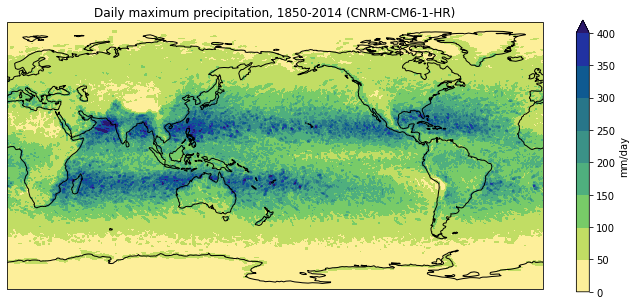

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmocean

#maximum.data = maximum.data * 86400
#maximum.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
maximum.plot.contourf(ax=ax,
                      levels=np.arange(0, 450, 50),
                      extend='max',
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={'label': pr_max.units},
                      cmap=cmocean.cm.haline_r)
ax.coastlines()

# ,

title = 'Daily maximum precipitation, 1850-2014 (%s)' %(dset.attrs['source_id'])
plt.title(title)

plt.savefig('pr_max.png', bbox_inches='tight')

### Notes

If you don't specify a chunk size when reading the data in, it just uses the size of the netCDF files themselves (7 chunks, 9.47 GB each). That takes 17 minutes to process on one core, and you get a memory error on multiple cores since according to the [Dask documentation](https://docs.dask.org/en/latest/array-chunks.html): "A chunk should be small enough to fit comfortably in memory. We’ll have many chunks in memory at once."

It doesn't look like the new [xarray rechunking functionality](https://github.com/pangeo-data/rechunker/pull/52) has formally released yet, so it's probably best to specify the chunk size you want when reading in the data. e.g.
```python
dset = xr.open_mfdataset(accesscm2_tos_file_list, combine='by_coords', chunks={'time':'100MB'})
```

Results for different chunk sizes:
- 500MB (150 chunks): 3 min 44 sec serial, 2 min 33 sec parallel
